In [1]:
# Steps we will be following
# Importing Libraries and Datasets
# Preprocessing and cleaning the reviews 
# Analysis of the Dataset
# Converting text into Vectors
# Model training, Evaluation, and Prediction

In [4]:
# Lets import all neccesary libraries we will use for this project

# we are using this library for getting ride of any unwanted warnings during the process
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [5]:
# For NLP task we need various NLP toolkits and libraries lets download it all

import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Nimbus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nimbus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
data = pd.read_csv('AmazonReview.csv')
data.head(10)

,Review,Sentiment
0,Fast shipping but this product is very cheaply...,1
1,This case takes so long to ship and it's not e...,1
2,Good for not droids. Not good for iPhones. You...,1
3,The cable was not compatible between my macboo...,1
4,The case is nice but did not have a glow light...,1
5,The cable keeps coming up with message that th...,1
6,This pos broke off in my phone after 3 uses an...,1
7,This product suck its hard 2 hear wat other ar...,1
8,Music cuts off within 30 secs. I like Aukey's ...,1
9,Yeah when they say mirror screen they mean it ...,1


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     24999 non-null  object
 1   Sentiment  25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB


In [8]:
data.dropna(inplace=True)

In [9]:
# sentiment column containing less than 3 value will be considered 0 and value rated above 3 will be considered 1
#1,2,3->negative(i.e 0)
data.loc[data['Sentiment']<=3,'Sentiment'] = 0

#4,5->positive(i.e 1)
data.loc[data['Sentiment']>3,'Sentiment'] = 1


In [10]:
# Now we will clean the review column by removing the stopwords
# this function will iterate over words in review and 
stp_words=stopwords.words('english')
def clean_review(review):
    cleanreview=" ".join(word for word in review.
                    split() if word not in stp_words)
    return cleanreview

data['Review']=data['Review'].apply(clean_review)


In [11]:
# Lets have a look at improved dataset after cleaning 
data.head()

,Review,Sentiment
0,Fast shipping product cheaply made I brought g...,0
1,This case takes long ship even worth DONT BUY!!!!,0
2,Good droids. Not good iPhones. You cannot use ...,0
3,The cable compatible macbook iphone. Also conn...,0
4,The case nice glow light. I'm disappointed pro...,0


In [12]:
data['Sentiment'].value_counts()

0    15000
1     9999
Name: Sentiment, dtype: int64

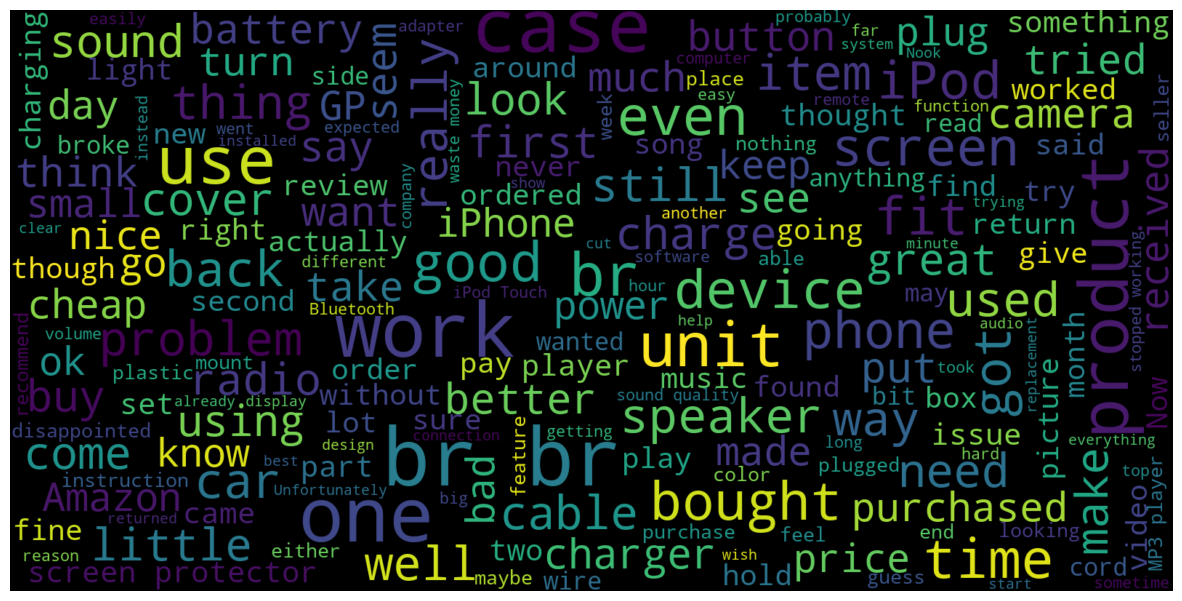

In [13]:
# In order to have the better picture of the importance of the words 
# let’s create the Wordcloud of all the words with sentiment = 0 i.e. negative

consolidated=' '.join(word for word in data['Review'][data['Sentiment']==0].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()


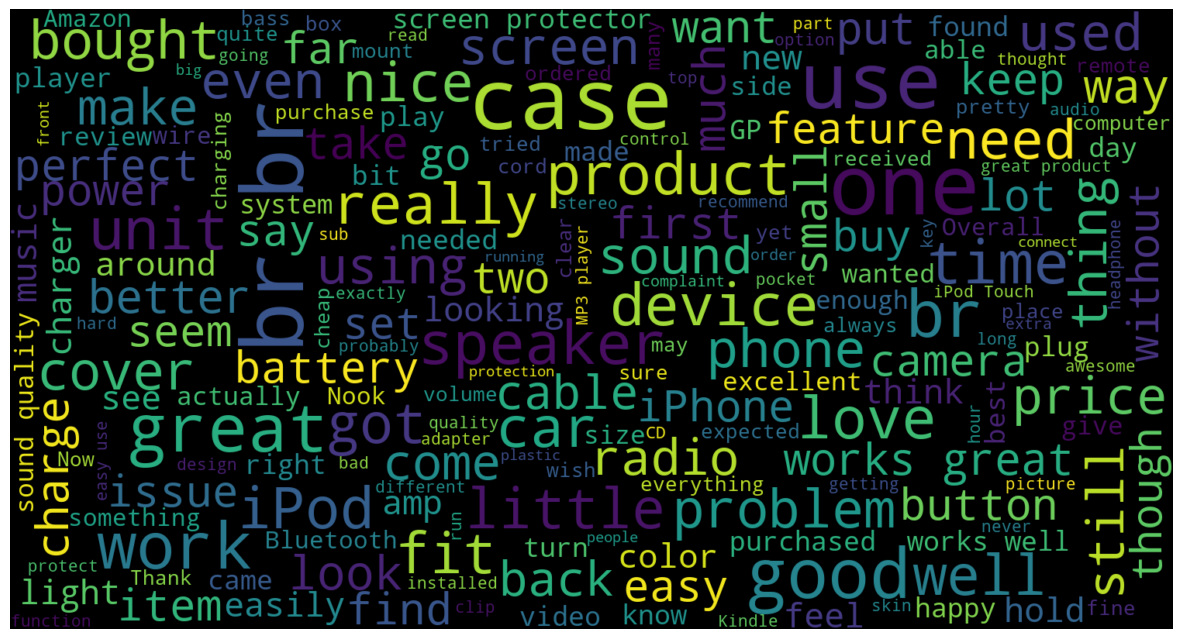

In [14]:
# Now we will create Wordcloud for the words with sentiment = 1 i.e. positive

consolidated = ' '.join(word for word in data['Review'][data['Sentiment']==1].astype(str))
wordCloud = WordCloud(width = 1500, height = 800, random_state = 20, max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated), interpolation = 'bilinear')                                           
plt.axis('off')
plt.show()

In [15]:
# TF-IDF calculates that how relevant a word in a series or corpus is to a text. 
# The meaning increases proportionally to the number of times in the text a word appears but is compensated by the word frequency in the corpus (data-set). 
# We will be implementing this with the code below.

cv = TfidfVectorizer(max_features=2500)
X = cv.fit_transform(data['Review'] ).toarray()

In [16]:
X.shape

(24999, 2500)

In [17]:
# Model training, Evaluation, and Prediction
# Once analysis and vectorization is done. We can now explore any machine learning model to train the data.

from sklearn.model_selection import train_test_split
x_train ,x_test,y_train,y_test=train_test_split(X,data['Sentiment'],
                                                test_size=0.25 ,
                                                random_state=42)


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Lets create instance for linear regression
model=LogisticRegression()

#Model fitting
model.fit(x_train,y_train)

#testing the model
pred=model.predict(x_test)

#model accuracy
print(accuracy_score(y_test,pred)*100)



81.632


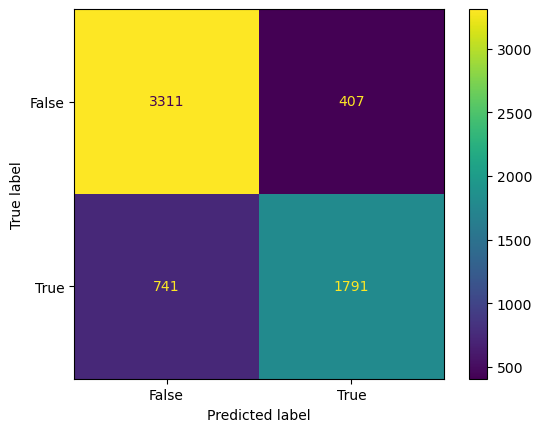

In [24]:
# Lets plot the confusion matrix now 

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,
                                            display_labels = [False, True])

cm_display.plot()
plt.show()
